In [1]:
# %load startup
import numpy as np
from pathlib import Path
import time

from IPython.core.display import display, HTML
display(HTML("<style>"
             + "#notebook { padding-top:0px !important; } "
             + ".container { width:100% !important; } "
             + ".end_space { min-height:0px !important; } "
             + "</style>"))

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd
pd.options.display.max_colwidth = 100
pd.options.display.precision = 2

import pprint
pp = pprint.PrettyPrinter(indent=4, width=100)

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(module)s:%(lineno)d %(funcName)s %(levelname)s %(message)s')

In [15]:
print(22.138/47.85)

0.4626541274817137


(array([0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82]),
 <a list of 11 Text yticklabel objects>)

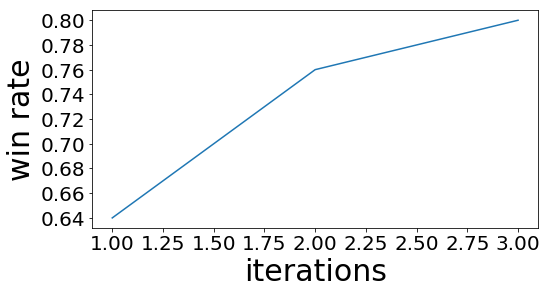

In [32]:
win_rates = np.array([0.64, 0.76, 0.8])
x = np.array(list(range(1, len(win_rates)+1)), dtype=int)
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x, win_rates)
#ax.set_aspect(1.2)
ax.set_xlabel('iterations', fontsize=30)
ax.set_ylabel('win rate', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [11]:
from model_config import ModelConfig

def show_result(game_result_path):
    game_result_path = Path(game_result_path)
    for i, csv_file in enumerate(game_result_path.glob('*.csv')):
        game_number = csv_file.stem.split('_')[1]
        game_result_pd = pd.read_csv(csv_file)
        rewards = game_result_pd['reward'].values
        win_rate = np.sum(rewards>0)/len(rewards) 
        median_time = np.median(game_result_pd['time'].values)
        game_config_file = game_result_path/f'config_{game_number}.yaml'
        if game_config_file.exists():
            config = ModelConfig.from_yaml(game_config_file)
            print(f'{game_number}: black win rate={win_rate}, '
                  f'num_games={len(game_result_pd)}, '
                  f'time/game={median_time:.3f}, '
                  f'rollout={config.mcts_num_rollout}, '
                  f'komi={config.komi}')
        else:
            print(f'{game_number}: black win rate={win_rate}, '
                  f'num_games={len(game_result_pd)}, '
                  f'time/game={median_time:.3f}')

In [15]:
show_result('/home/peng_liu/src/tmp/game_result/random_vs_random/')

2: black win rate=0.766, num_games=1000, time/game=0.002, rollout=1000, komi=0
1: black win rate=0.45, num_games=100, time/game=0.002


In [17]:
show_result('/home/peng_liu/src/tmp/game_result/nn_vs_random/')

2: black win rate=0.763, num_games=1000, time/game=0.090, rollout=1000, komi=0
1: black win rate=0.157, num_games=1000, time/game=0.365


In [13]:
show_result('/home/peng_liu/src/tmp/game_result/mcts_vs_random/')

2: black win rate=0.959, num_games=1000, time/game=22.138, rollout=1000, komi=0
0: black win rate=1.0, num_games=10, time/game=26.256
1: black win rate=0.99, num_games=100, time/game=29.329, rollout=1000, komi=0
